## LOADING CSV FILE

In [53]:
import pandas as pd
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## EXPLORATORY DATA ANALYSIS

In [54]:
df.shape

(13320, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [56]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [57]:
df=df.drop("society",axis=1)

In [58]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [59]:
df.price=df.price*1_00_000

In [60]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

#### THERE IS VERY FEW NULL VALUES COMPARING WITH DATASET SHAPE SO WE REMOVING THEM

In [61]:
df.dropna(axis=0,inplace=True)

In [62]:
df.shape

(12710, 8)

In [63]:
df.location.value_counts()

location
Whitefield         514
Sarjapur  Road     372
Electronic City    300
Kanakpura Road     261
Thanisandra        231
                  ... 
Gulakamale           1
Duddanahalli         1
Doddanakunte         1
Jogupalya            1
Abshot Layout        1
Name: count, Length: 1265, dtype: int64

In [64]:
df.total_sqft.dtype

dtype('O')

In [65]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### WE CAN OBSERVE SOME OF THE STRANGE DATA POINTS IN THE DATASET WE NEED TO CONVERT THEM TO FLOAT DATA POINTS

In [66]:
def non_int(x):
    try:
        float(x)
        return False
    except:
        return True
len(df["total_sqft"][df.total_sqft.apply(lambda x:non_int(x))])

186

In [67]:
def avg_sqft(x):
    try:
        return float(x)
    except:
        try:
            lis=x.split("-")
            return float(int(lis[0])+int(lis[1]))/2
        except:
            return None

In [68]:
df.total_sqft=df.total_sqft.apply(lambda x:avg_sqft(x))

In [69]:
df.total_sqft.dtype

dtype('float64')

In [70]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [71]:
df.availability[df.availability.apply(lambda x:True if (len(x)>7) else False )]

1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
5        Ready To Move
             ...      
13313    Ready To Move
13314    Ready To Move
13315    Ready To Move
13317    Ready To Move
13319    Ready To Move
Name: availability, Length: 10077, dtype: object

#### AS WE CAN SEE, THE VALUES IN THE AVAILABILITY FEATURE ARE NOT UNIFORM, SO WE ARE REMOVING THAT COLUMN

In [72]:
df.drop("availability",axis=1,inplace=True)

In [73]:
df.size=df["size"].apply(lambda x:x.split(" ")[0])

In [74]:
df["size"]

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13317    2
13318    4
13319    1
Name: size, Length: 12710, dtype: object

In [75]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,12000000.0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,5100000.0


In [76]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [77]:
import scipy.stats as stats
groups=[groups for _,groups in df.groupby(df.area_type)["price"]]
f_stat,p_val=stats.f_oneway(*groups)
p_val,f_stat

(np.float64(1.1191678526793736e-231), np.float64(372.1343558181872))

In [78]:
df.area_type.value_counts()

area_type
Super built-up  Area    8481
Built-up  Area          2310
Plot  Area              1837
Carpet  Area              82
Name: count, dtype: int64

#### AS WE CAN OBSERVE, THE AREA_TYPE FEATURE HAS A SIGNIFICANT IMPACT ON THE DEPENDENT FEATURE.

In [79]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,12000000.0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,5100000.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12665 non-null  float64
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(4), object(3)
memory usage: 794.4+ KB


In [81]:
import scipy.stats as stats
groups=[groups for _,groups in df.groupby(df.location)["price"]]
f_stat,p_val=stats.f_oneway(*groups)
p_val,f_stat

(np.float64(0.0), np.float64(5.568236108747639))

#### ABOVE, WE PERFORMED AN ANOVA TEST, WHICH HELPS US UNDERSTAND WHETHER THERE IS ANY SIGNIFICANT CHANGE IN THE DEPENDENT FEATURE.

In [82]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,12000000.0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,5100000.0


In [83]:
df.describe()

,total_sqft,bath,balcony,price
count,12665.000000,12710.000000,12710.000000,1.271000e+04
mean,1511.798722,2.617309,1.584343,1.060608e+07
std,1162.112181,1.226000,0.817287,1.317661e+07
min,5.000000,1.000000,0.000000,8.000000e+05
25%,1100.000000,2.000000,1.000000,4.903000e+06
50%,1260.000000,2.000000,2.000000,7.000000e+06
75%,1640.000000,3.000000,2.000000,1.150000e+07
max,52272.000000,40.000000,3.000000,2.912000e+08


#### ABOVE DATAFRAME GIVES ALL THE NUMERIC STATISTICS WHICH CAN BE USED TO UNDERSTAND THE SPREAD OF THE DATA 

In [84]:
df.total_sqft[df.total_sqft<=10]

4972    5.0
Name: total_sqft, dtype: float64

In [85]:
#CHANGING TYPE OF SIZE FEATURE
df["size"].dtype

dtype('O')

In [86]:
df["size"]=df["size"].astype(int)

In [87]:
mask=(df.total_sqft<300)&(df["size"]>=1)|(df.bath>df["size"])

#### IT IS DIFFICULT TO BUILD AN HOUSE UNDER THE 300SQFT SO WE CONSIDERED THEM AS OUTLIERS

In [88]:
df=df[~mask]

In [89]:
df.shape

(11919, 7)

In [90]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,5100000.0
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,3800000.0


In [91]:
mask=df.balcony<=df["size"]

In [92]:
df=df[mask]

In [93]:
df.shape

(11570, 7)

In [94]:
df[df.total_sqft<600]

,area_type,location,size,total_sqft,bath,balcony,price
24,Super built-up Area,Thanisandra,1,510.0,1.0,0.0,2525000.0
70,Plot Area,Double Road,3,500.0,3.0,2.0,10000000.0
78,Built-up Area,Kaval Byrasandra,2,460.0,1.0,0.0,2200000.0
171,Super built-up Area,Attibele,1,450.0,1.0,1.0,1100000.0
177,Plot Area,Nagavara,1,400.0,1.0,0.0,1400000.0
...,...,...,...,...,...,...,...
13161,Super built-up Area,Makali,1,530.0,1.0,1.0,1800000.0
13220,Built-up Area,Attibele,1,520.0,1.0,1.0,1500000.0
13224,Super built-up Area,Chandapura,1,520.0,1.0,1.0,1404000.0
13273,Super built-up Area,Raja Rajeshwari Nagar,1,510.0,1.0,1.0,2200000.0


#### THE HOUSES ABOVE 300SQFT ARE TECHNICALLY POSSIBLE 

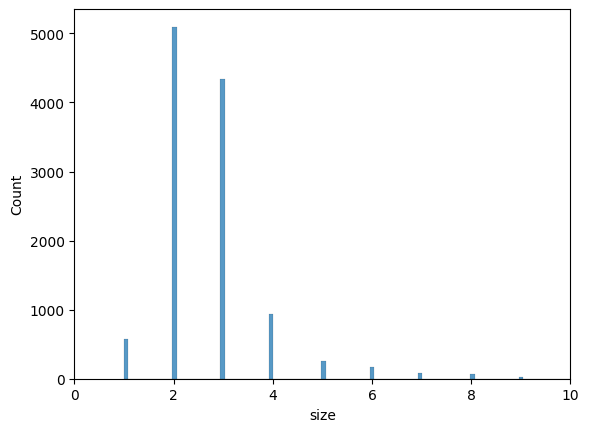

In [95]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(df["size"])
plt.xlim(0,10)
plt.show()

In [96]:
(df["size"]>=8).sum()

np.int64(104)

In [97]:
df[df["size"]>=8]

,area_type,location,size,total_sqft,bath,balcony,price
64,Built-up Area,Bommanahalli,8,3000.0,8.0,0.0,14000000.0
68,Plot Area,Devarachikkanahalli,8,1350.0,7.0,0.0,8500000.0
241,Plot Area,Mukkutam Nagar,8,2600.0,8.0,2.0,18000000.0
459,Super built-up Area,1 Giri Nagar,11,5000.0,9.0,3.0,36000000.0
538,Super built-up Area,Mico Layout,9,5000.0,9.0,3.0,21000000.0
...,...,...,...,...,...,...,...
12724,Plot Area,HAL 2nd Stage,8,1000.0,7.0,3.0,26000000.0
13187,Built-up Area,Chikkabanavar,8,4000.0,7.0,0.0,11000000.0
13198,Plot Area,Pattegarhpalya,8,1200.0,8.0,0.0,14000000.0
13221,Plot Area,T Dasarahalli,9,1178.0,9.0,1.0,7500000.0


In [98]:
non_out_df=df[(df["price"]<((df["price"].mean())+(3*df["price"].std())))&(df["price"]>((df["price"].mean())-(3*df["price"].std())))]

#### ABOVE WE ARE REMOVING THE OUTLIERS BY USING THE 3 STANDARD DEVIATIONS FROM THE MEAN

In [99]:
non_out_df.drop("area_type",axis=1)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
2,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Kothanur,2,1200.0,2.0,1.0,5100000.0
5,Whitefield,2,1170.0,2.0,1.0,3800000.0
...,...,...,...,...,...,...
13313,Uttarahalli,3,1345.0,2.0,1.0,5700000.0
13314,Green Glen Layout,3,1715.0,3.0,3.0,11200000.0
13315,Whitefield,5,3453.0,4.0,0.0,23100000.0
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,6000000.0


In [100]:
non_out_df.shape

(11385, 7)

In [101]:
non_out_df["price"].mean()

np.float64(8789171.146245059)

In [102]:
non_out_df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,5100000.0
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,3800000.0


<Axes: xlabel='price', ylabel='Count'>

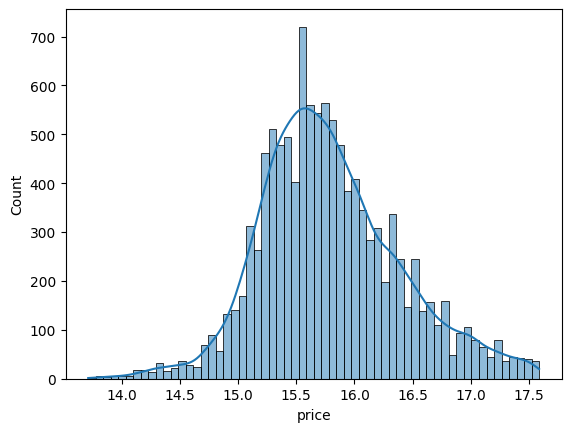

In [103]:
import numpy as np
sns.histplot(np.log1p(non_out_df["price"]),kde=True)


In [104]:
non_out_df["price"]=np.log1p(non_out_df.price)

C:\Users\vamsi\AppData\Local\Temp\ipykernel_10356\883670511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_out_df["price"]=np.log1p(non_out_df.price)


(0.0, 52272.0)

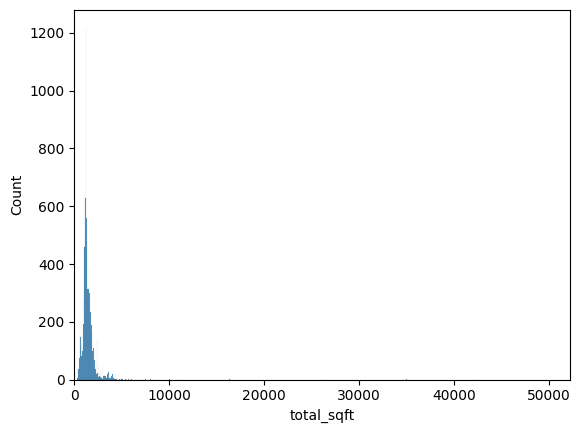

In [105]:
sns.histplot(non_out_df["total_sqft"])
plt.xlim(0,non_out_df.total_sqft.max())

In [106]:
non_out_df=non_out_df[(non_out_df["total_sqft"]<((non_out_df["total_sqft"].mean())+(3*non_out_df["total_sqft"].std())))&(non_out_df["total_sqft"]>((non_out_df["total_sqft"].mean())-(3*non_out_df["total_sqft"].std())))]

In [107]:
non_out_df.shape

(11281, 7)

<Axes: xlabel='total_sqft', ylabel='Count'>

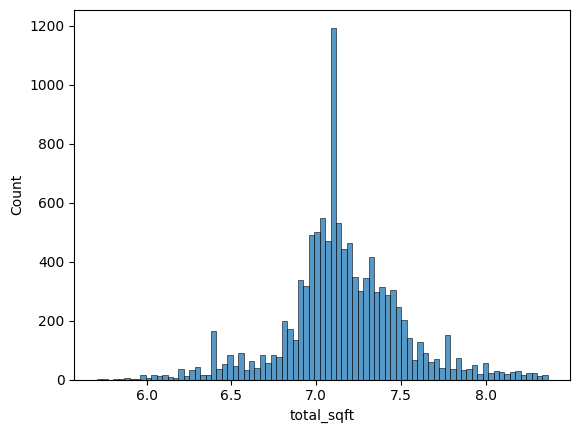

In [108]:
sns.histplot(np.log1p(non_out_df["total_sqft"]))

#### ABOVE WE REMOVED THE OUTLIERS FROM THE TOTAL_SQFT FEATURE AND APPLIED LOG TO REDUCE THE SCALE WHICH HELPS US GETS CLOSER TO NORMAL DISTRIBUTION

In [109]:
non_out_df["total_sqft"]=np.log1p(non_out_df["total_sqft"])

In [110]:
non_out_df.location=non_out_df.location.str.strip()
non_out_df.location
locations_under_10=non_out_df.groupby("location")["location"].count()
locations_under_10=list(locations_under_10[non_out_df.groupby("location")["location"].count()<=10].index)
locations_under_10
non_out_df.location=non_out_df["location"].apply(lambda x:"other" if (x in locations_under_10) else x)

In [111]:
dummies=pd.get_dummies(non_out_df[["location","area_type"]],drop_first=True,dtype=int,prefix="",prefix_sep="")

In [112]:
final_df=pd.concat([non_out_df,dummies],axis=1)

#### ABOVE WE CONVERTED THE LOCATION COLUMN INTO FEW DATA VALUES IN ORDER TO REDUCE THE HIGH DIMENSIONALITY DUE TO INCREASE OF FEATURES AND WE CONVERTED THE CATEGORICAL FEATURES IN TO THE NUMERICAL FEATURES

In [113]:
final_df.head()

,area_type,location,size,total_sqft,bath,balcony,price,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2,6.963190,2.0,1.0,15.178281,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Built-up Area,Uttarahalli,3,7.273093,2.0,3.0,15.640060,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3,7.327781,3.0,1.0,16.066802,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,Kothanur,2,7.090910,2.0,1.0,15.444751,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Super built-up Area,Whitefield,2,7.065613,2.0,1.0,15.150512,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [114]:
non_out_df.shape

(11281, 7)

In [115]:
final_df.drop(["location","area_type"],axis=1,inplace=True)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=final_df.drop("price",axis=1)
y=final_df["price"]

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
model=lr.fit(X_train,y_train)
model.score(X_test,y_test)

0.7319857888535897

### OUR LINEAR REGRESSION MODEL GOT 73% ACCURACY WITH DATASET WHICH DOESNT HAVE OUTLIERS 

In [118]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr_model=dtr.fit(X_train,y_train)
dtr_model.score(X_test,y_test)

0.6062830827200076

### DECISION TREE DOES NOT PERFORMED WELL

# HYPER PARAMETER TUNING

In [208]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "max_depth":[15,20,None],
    "min_samples_split":[90,95,100],
    "min_samples_leaf":[1,2,3]
}
gsc=GridSearchCV(estimator=dtr_model,param_grid=param_grid,cv=5)
gsc_model=gsc.fit(X_train,y_train)
gsc_model.best_score_

np.float64(0.722638313181214)

In [120]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(estimator=gsc_model,X=X,y=y,cv=5)
print(gsc.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 95}


In [121]:
cv.mean()

np.float64(0.7196546260045283)

## WITH OUTLIER

In [122]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,5100000.0
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,3800000.0


In [123]:
df.location=df.location.str.strip()
df.location
locations_under_10=df.groupby("location")["location"].count()
locations_under_10=list(locations_under_10[df.groupby("location")["location"].count()<=10].index)
locations_under_10
df.location=df["location"].apply(lambda x:"other" if (x in locations_under_10) else x)

In [124]:
dummies=pd.get_dummies(df[["location","area_type"]],drop_first=True,dtype=int,prefix="",prefix_sep="")

In [125]:
final_out_df=pd.concat([non_out_df,dummies],axis=1)
final_out_df.head()

,area_type,location,size,total_sqft,bath,balcony,price,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2.0,6.963190,2.0,1.0,15.178281,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Built-up Area,Uttarahalli,3.0,7.273093,2.0,3.0,15.640060,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3.0,7.327781,3.0,1.0,16.066802,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,Kothanur,2.0,7.090910,2.0,1.0,15.444751,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Super built-up Area,Whitefield,2.0,7.065613,2.0,1.0,15.150512,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [126]:
df.shape

(11570, 7)

In [127]:
final_out_df.drop(["location","area_type"],axis=1,inplace=True)

In [196]:
X=final_out_df.drop("price",axis=1)
y=final_out_df["price"]
X.dropna(axis=0,inplace=True)
y.dropna(axis=0,inplace=True)

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
model=lr.fit(X_train,y_train)
model.score(X_test,y_test)

0.7319857888535897

In [130]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr_model=dtr.fit(X_train,y_train)
dtr_model.score(X_test,y_test)

0.6006407521939061

In [131]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "max_depth":[10,15,20],
    "min_samples_split":[5,10,100],
    "min_samples_leaf":[1,2,3]
}
gsc=GridSearchCV(estimator=dtr_model,param_grid=param_grid,cv=5)
gsc_model=gsc.fit(X_train,y_train)
gsc_model.best_score_

np.float64(0.7202678453212844)

In [132]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(estimator=gsc_model,X=X,y=y,cv=5)
cv.mean()

np.float64(0.7186156042248346)

In [133]:
gsc.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 100}

In [210]:
dtr=DecisionTreeRegressor(max_depth=100, min_samples_leaf=2, min_samples_split=100)
final_model=dtr.fit(X_train,y_train)
final_model.score(X_test,y_test)

0.7043713392830191

In [189]:
from sklearn.ensemble import RandomForestRegressor
rnd=RandomForestRegressor()
rnd.fit(X_train,y_train)
rnd.score(X_test,y_test)

0.7188322871691349

In [136]:
param_grid={
    "n_estimators":[3],
    "max_depth":[10,15,20],
    "min_samples_split":[3,4,5],
    "min_samples_leaf":[1,2,3]
}
gsc=GridSearchCV(estimator=rnd,param_grid=param_grid,cv=5)
gsc_model=gsc.fit(X_train,y_train)
gsc_model.best_score_

np.float64(0.721454042207179)

In [137]:
gsc_model.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 3}

In [138]:
rnd=RandomForestRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=5)
rnd.fit(X_train,y_train)
rnd.score(X_test,y_test)

0.7237154120880297

In [139]:
cv=cross_val_score(estimator=rnd,X=X,y=y,cv=5)

In [140]:
cv

array([0.75047654, 0.74216643, 0.72772394, 0.75954194, 0.74504719])

# CONCLUSION

## OUR LINEAR REGRESSION MODEL PERFORMED WELL ON BOTH THE DATASETS HAVING OUTLIERS AND WITHOUT HAVING OUTLIERS BOTH THE MODELS ALMOST GOT 73% ACCURACY AS THE MODEL WITH OUTLIERS PERFORMED WELL AND DOESNT HAVE ANY GENERALIZATION PROBLEM WE CAN CHOOSE THAT AS IT HAS MORE DATA COMPARED WITH NON OUTLIERS DATASET

In [152]:
X.head(1)

,size,total_sqft,bath,balcony,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Carpet Area,Plot Area,Super built-up Area
0,2.0,6.96319,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lis=[2.0,float(np.log1p(1200.0)),2.0,1.0]
text1="Kothanur"
text2="Super built-up Area"
for i in X.columns[4:]:
    if i==text1 or i==text2:
        lis.append(1)
    else:
        lis.append(0)
for i in lis:
    if i>=1:
        print(i)

2.0
7.0909098220799835
2.0
1.0
1


## I HAVE SELECTED THE THE MODEL WHICH GIVES THE HIGHEST AND FASTEST RESULT THAT IS LINEAR REGRESSION WITH 73% ACCUARCY 

In [171]:
import pickle
with open("model.pkl","wb") as file:
    pickle.dump(model,file)